<a href="https://colab.research.google.com/github/27136thapelo/Insurance-Claim-Analysis/blob/main/Insurance_claim_analysis_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Insurance Claim Analaysis

___________________________________________________________________________

Contributors:

1. Nokukhanya Magagaula
2. Thapelo Nkhumishe

____________________________________________________________________________

# Table of Contents

<a href=#one>1. Problem Statement</a>

<a href=#two>2. Importing Packages</a>

<a href=#three>3. Loading the Data</a>

<a href=#four>4. Data Description</a>

<a href=#five>5. Data Pre-processing</a>

<a href=#six>6. Exploratory Data Analysis (EDA)</a>



 <a id="one"></a>
## 1. Problem Statement
<a href=#cont>Back to Table of Contents</a>

---

This dataset contains insightful information related to insurance claims, giving us an in-depth look into the demographic patterns of those receiving them. The dataset contains information on patient age, gender, BMI (Body Mass Index), blood pressure levels, diabetic status, number of children, smoking status and region. 

By analyzing these key factors across geographical areas and across different demographics such as age or gender we can gain a greater understanding of who is most likely to receive an insurance claim. This understanding gives us valuable insight that can be used to inform our decision making when considering potential customers for our services. 

On a broader scale it can inform public policy by allowing for more targeted support for those who are most in need and vulnerable. These kinds of insights are extremely valuable and this dataset provides us with the tools we need to uncover them!

(Data source: https://www.kaggle.com/datasets/thedevastator/insurance-claim-analysis-demographic-and-health)

 <a id="two"></a>
## 2. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---

In [35]:
import pandas as pd
import numpy as np
import re
import math 
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline 
import seaborn as sns


 <a id="three"></a>
## 3. Loading the Data
<a href=#cont>Back to Table of Contents</a>

---

In [13]:
df = pd.read_csv("https://raw.githubusercontent.com/27136thapelo/Insurance-Claim-Analysis/main/insurance_data.csv")

#brief look at the data 
df.head()

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


 <a id="four"></a>
## 4. Data Description
<a href=#cont>Back to Table of Contents</a>

---

The dataset consists of 11 columns, namely:

- index
- PatientID - unique identifier of the patient
- Age - age of patient
- gender -  gender of patient
- bmi - patient's body mass index
- bloodpressure - patient's blood pressure
- diabetic - Whether the insured person is diabetic or not. (Boolean)
- children - Number of children of the insured person. (Integer)
- smoker - Whether the insured person is a smoker or not. (Boolean)
- region
- claim - Amount of the insurance claim. (Float)

 <a id="five"></a>
## 5. Data Pre-processing
<a href=#cont>Back to Table of Contents</a>

---

In [3]:
#Checking the number of columns and rows 
df.shape

(1340, 11)

In [10]:
#Checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1340 non-null   int64  
 1   PatientID      1340 non-null   int64  
 2   age            1340 non-null   float64
 3   gender         1340 non-null   object 
 4   bmi            1340 non-null   float64
 5   bloodpressure  1340 non-null   int64  
 6   diabetic       1340 non-null   object 
 7   children       1340 non-null   int64  
 8   smoker         1340 non-null   object 
 9   region         1340 non-null   object 
 10  claim          1340 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 115.3+ KB


In [14]:
#Checking data for null values 
df.isna().sum()

index            0
PatientID        0
age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

As observed above it appears that age column has 5 null values and the region column has 3 null values. To handle those null values, we will do the following:


*   impute the age null values with the mean (average)
*   impute the region null values with the mode (frequently occuring value)



In [15]:
df['region'].fillna(df['region'].mode()[0], inplace=True)

df.isna().sum()

index            0
PatientID        0
age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           0
claim            0
dtype: int64

In [17]:
df['age'].fillna(df['age'].mean(), inplace=True)
df['age'] = round(df['age'])
    
df.isna().sum()

index            0
PatientID        0
age              0
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           0
claim            0
dtype: int64

In [18]:
df.head()

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,38.0,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,38.0,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,38.0,male,34.1,100,No,0,No,northwest,1137.01


The age column's data type is float and that is why the age values are in decimal format. To ensure whole numbers for our visuals and for readability, we will convert the column to integer data type. 

In [19]:
df['age'] = df['age'].astype(int)

df.head()

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,38,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,38,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,38,male,34.1,100,No,0,No,northwest,1137.01


The columns 'diabetic' and 'smoker' has yes/no values, which might be confusing if one isn't familiar with the dataset. To avoid confusion and have easy to understand visuals, we will change the values to "diabetic/non-diabetic" and "smoker/non-smoker", respectively. 

In [24]:
df['diabetic'] = df['diabetic'].replace({'Yes': 'diabetic', 'No': 'non-diabetic'})

df['smoker'] = df['smoker'].replace({'Yes': 'smoker', 'No': 'non-smoker'})

df.head()


,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39,male,23.2,91,diabetic,0,non-smoker,southeast,1121.87
1,1,2,24,male,30.1,87,non-diabetic,0,non-smoker,southeast,1131.51
2,2,3,38,male,33.3,82,diabetic,0,non-smoker,southeast,1135.94
3,3,4,38,male,33.7,80,non-diabetic,0,non-smoker,northwest,1136.40
4,4,5,38,male,34.1,100,non-diabetic,0,non-smoker,northwest,1137.01


Now the smoker and diabitic features include diabetic/non-diabetic and smoker/non- smoker instead of yes and no.



In [25]:
# Dropping index column to remove noise

df = df.drop("index", axis=1)

In [26]:
df.head()

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,1,39,male,23.2,91,diabetic,0,non-smoker,southeast,1121.87
1,2,24,male,30.1,87,non-diabetic,0,non-smoker,southeast,1131.51
2,3,38,male,33.3,82,diabetic,0,non-smoker,southeast,1135.94
3,4,38,male,33.7,80,non-diabetic,0,non-smoker,northwest,1136.40
4,5,38,male,34.1,100,non-diabetic,0,non-smoker,northwest,1137.01


 <a id="six"></a>
## 6.Exploratory Data Analysis (EDA)
<a href=#cont>Back to Table of Contents</a>

The main purpose of EDA is to help look at data before making any assumptions. It can help identify obvious errors, as well as better understand patterns within the data, detect outliers or anomalous events, find interesting relations among the variables.

For this analysis project, our EDA will be split into two parts, namely:
- univariate analysis
- multivariate analysis

### 6.1 Univariate analysis



Univariate analysis explores each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It describes the pattern of response to the variable. It describes each variable on its own.

In [27]:
#We'll start with the summary statistics for the continuous data columns to evaluate which columns to pay close attention to 

df.describe()

,PatientID,age,bmi,bloodpressure,children,claim
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,670.500000,38.078358,30.668955,94.157463,1.093284,13252.745642
std,386.968991,11.082176,6.106735,11.434712,1.205334,12109.609288
min,1.000000,18.000000,16.000000,80.000000,0.000000,1121.870000
25%,335.750000,29.000000,26.275000,86.000000,0.000000,4719.685000
50%,670.500000,38.000000,30.400000,92.000000,1.000000,9369.615000
75%,1005.250000,47.000000,34.700000,99.000000,2.000000,16604.305000
max,1340.000000,60.000000,53.100000,140.000000,5.000000,63770.430000


#### Age

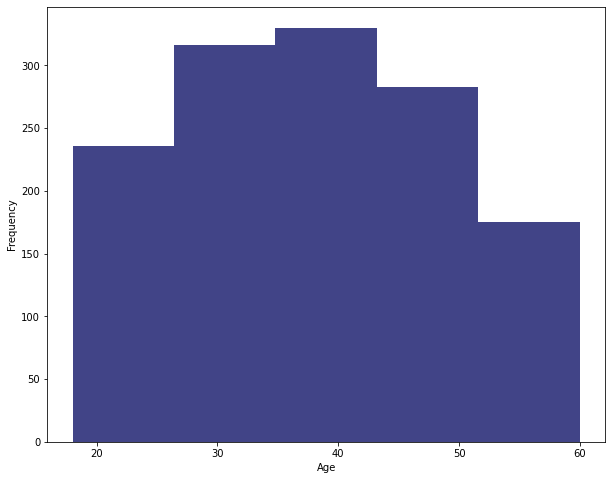

In [40]:
# define color map
cmap = cm.get_cmap('viridis')

# plot histogram of age with color map
plt.figure(figsize=(10, 8))
plt.hist(df['age'], bins=5, color=cmap(0.2))
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()